In [15]:
from imblearn.over_sampling import RandomOverSampler
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.impute import KNNImputer
from numpy import nan
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from kneed import KneeLocator
import warnings
warnings.filterwarnings("ignore")
df = pandas.read_csv("G:\\THYROID DETECTION\\thyroid-detection\\src\\dataset\\combined_csv\\train\\combined.csv")
df.drop(['id','tsh','tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured','tbg_measured','tbg'],axis =1,inplace=True)

for column in df.columns:
            count = df[column][df[column]=='?'].count()
            if count!=0:
                df[column] = df[column].replace('?',nan)

df['sex'] = df['sex'].map({'F':0 , 'M':1})
print(df.columns)
for column in df.columns:
    if  len(df[column].unique())<=2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
df = pandas.get_dummies(df, columns=['referral_source'])
lblEn = LabelEncoder()
labelencoding =lblEn.fit(df['class'])
df['class'] =lblEn.transform(df['class'])
imputer = KNNImputer(n_neighbors=3,weights='uniform', missing_values=nan)
model  = imputer.fit(df)
np_array = model.transform(df)

df = pandas.DataFrame(data = numpy.round(np_array, 4), columns=df.columns)
#print(X)
X = df.drop(columns = ["class"])
Y = df["class"]
resampler = RandomOverSampler(random_state=0)
X,Y = resampler.fit_sample(X, Y)
df = X.join(Y)
columns = ['age','t3','tt4','t4u','fti']
for column in columns:
    df[column] = np.log(1 + df[column])
print(f"Dataframe *******************{df}")
X = df.drop(columns = ["class"])
Y = df["class"]
# print(df.groupby(['class']).count())
# print(df.columns)



wcss = []
n = range(2, 15)
for i in n:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
kn = KneeLocator(n, wcss, curve='convex',
                            direction='decreasing')
n_clusters = kn.knee

kmeans = KMeans(n_clusters=n_clusters,
                             init='k-means++', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df['Cluster'] = y_kmeans
cluster_id = df['Cluster'].unique()

rfc = RandomForestClassifier(criterion="entropy",max_depth=5,max_features = "auto",n_estimators=10)
dtc = DecisionTreeClassifier()
params_rfc = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                               'criterion': ['gini', 'entropy'],
                               'max_depth': range(2, 6, 1),
                               'max_features': ['auto', 'log2'],
                               }     
model = GridSearchCV(estimator=rfc,
                     param_grid=params_rfc,
                     cv = 5,
                     verbose=True)
for id in cluster_id:
    clusterdata = df[df['Cluster']==id]
    x = clusterdata.drop(columns = ["class","Cluster"])
    y = clusterdata["class"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=42)



# X = df.drop(columns = ["class"])
# Y = df["class"]
# scaler = StandardScaler()
# #X[['fti','t4u','tt4','t3','tsh','age']] = scaler.fit_transform(X[['fti','t4u','tt4','t3','tsh','age']])


    #x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify=Y,random_state = 0)

    rfc.fit(x_train,y_train)
    #print(f"Cluster {id} {model.best_params_}, {model.best_score_}")
    rfc_predict = rfc.predict(x_test)
    print(f"Cluster {id} {accuracy_score(y_test,rfc_predict)},{precision_score(y_test,rfc_predict,average='weighted')}")


# fig, ax = plt.subplots(figsize = (10,10))
# sns.boxplot(data = X[['age','t3','tt4','t4u','fti']], ax=ax)'''


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'i131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 't3', 'tt4', 't4u', 'fti',
       'referral_source', 'class'],
      dtype='object')
Dataframe *******************            age  sex  on_thyroxine  query_on_thyroxine  \
0      4.025352  1.0           0.0                 0.0   
1      4.077537  1.0           0.0                 0.0   
2      3.610918  0.0           0.0                 0.0   
3      3.951244  0.0           0.0                 0.0   
4      4.174387  0.0           0.0                 0.0   
...         ...  ...           ...                 ...   
37102  3.850148  0.0           0.0                 0.0   
37103  3.737670  1.0           0.0                 0.0   
37104  3.737670  1.0           0.0                 0.0   
37105  3.850148  0.0           0.0       

C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

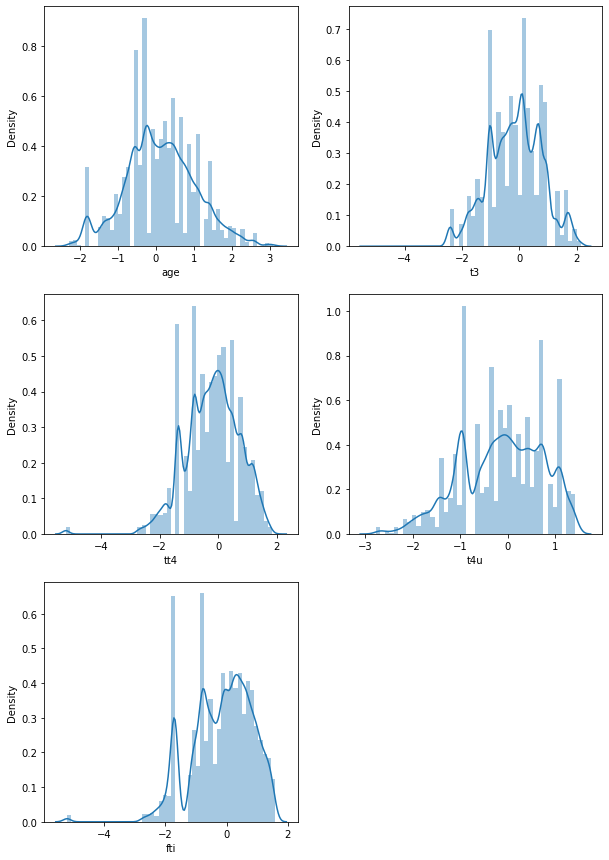

In [5]:
import matplotlib.pyplot as plot
columns = ['age','t3','tt4','t4u','fti']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(df_new[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\GOVIND CHOUDHARY\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be remo

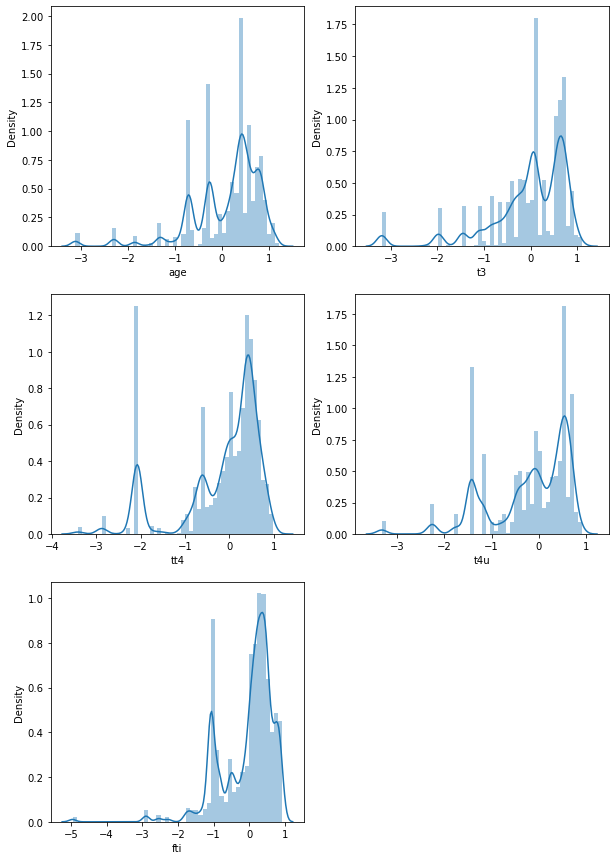

In [39]:
import numpy as np
plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    df_new[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(df_new[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()


In [7]:
import numpy as np
a= np.float(2)
b = np.float(2)
c = np.float(2)

if a>b and a>c:
    print(a)
elif b>a and b>c:
    print(b)
elif c>a and c>b:    
    print(c)